In [22]:
#SVM-SVC

In [23]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid',palette='rainbow')
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
%matplotlib inline

In [24]:
#Read The Dataset
df = pd.read_csv('https://raw.githubusercontent.com/KJanhavi2424/My-Datasets/main/SalaryData_Test(1).csv')
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [25]:
df2 = df.drop(columns=['workclass','education','maritalstatus','occupation','relationship','race','capitalloss','native','sex'])
df2

,age,educationno,capitalgain,hoursperweek,Salary
0,25,7,0,40,<=50K
1,38,9,0,50,<=50K
2,28,12,0,40,>50K
3,44,10,7688,40,>50K
4,34,6,0,30,<=50K
...,...,...,...,...,...
15055,33,13,0,40,<=50K
15056,39,13,0,36,<=50K
15057,38,13,0,50,<=50K
15058,44,13,5455,40,<=50K


In [26]:
df2.describe()

,age,educationno,capitalgain,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,40.951594
std,13.380676,2.558727,7703.181842,12.062831
min,17.000000,1.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,99.000000


In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           15060 non-null  int64 
 1   educationno   15060 non-null  int64 
 2   capitalgain   15060 non-null  int64 
 3   hoursperweek  15060 non-null  int64 
 4   Salary        15060 non-null  object
dtypes: int64(4), object(1)
memory usage: 588.4+ KB


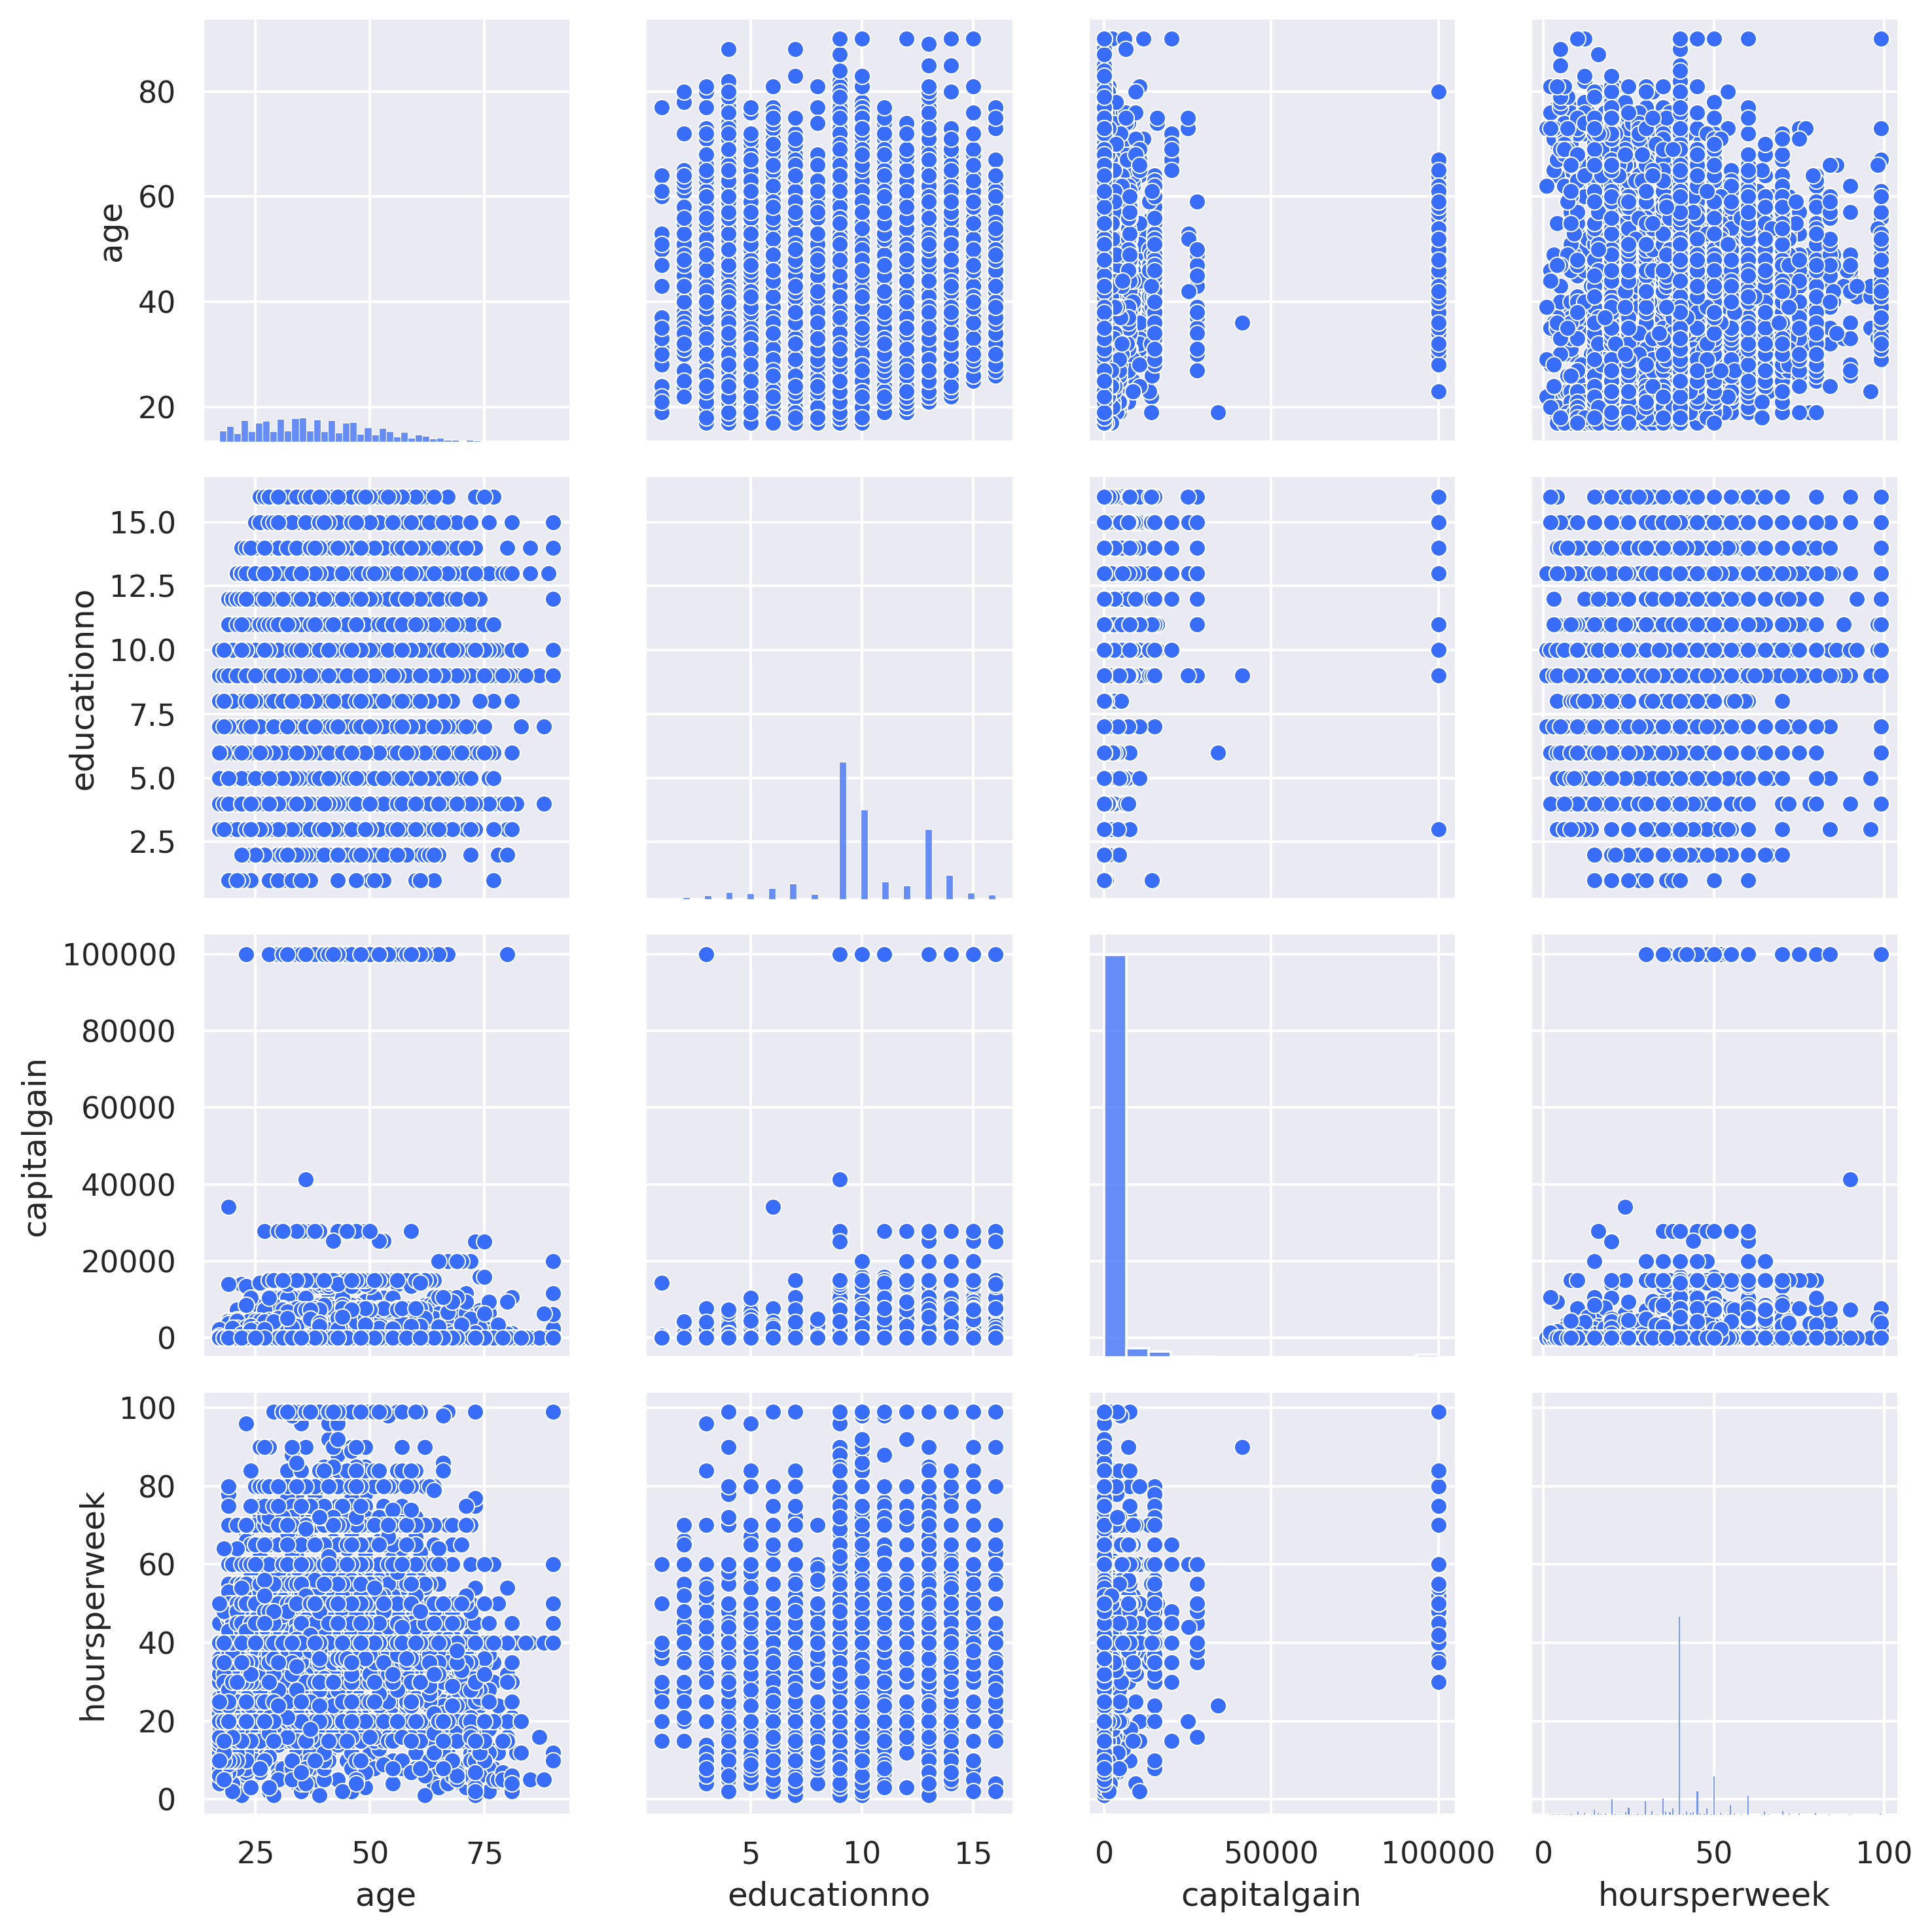

In [28]:
sns.pairplot(df2)
plt.tight_layout()
plt.show()

<Axes: xlabel='age', ylabel='hoursperweek'>

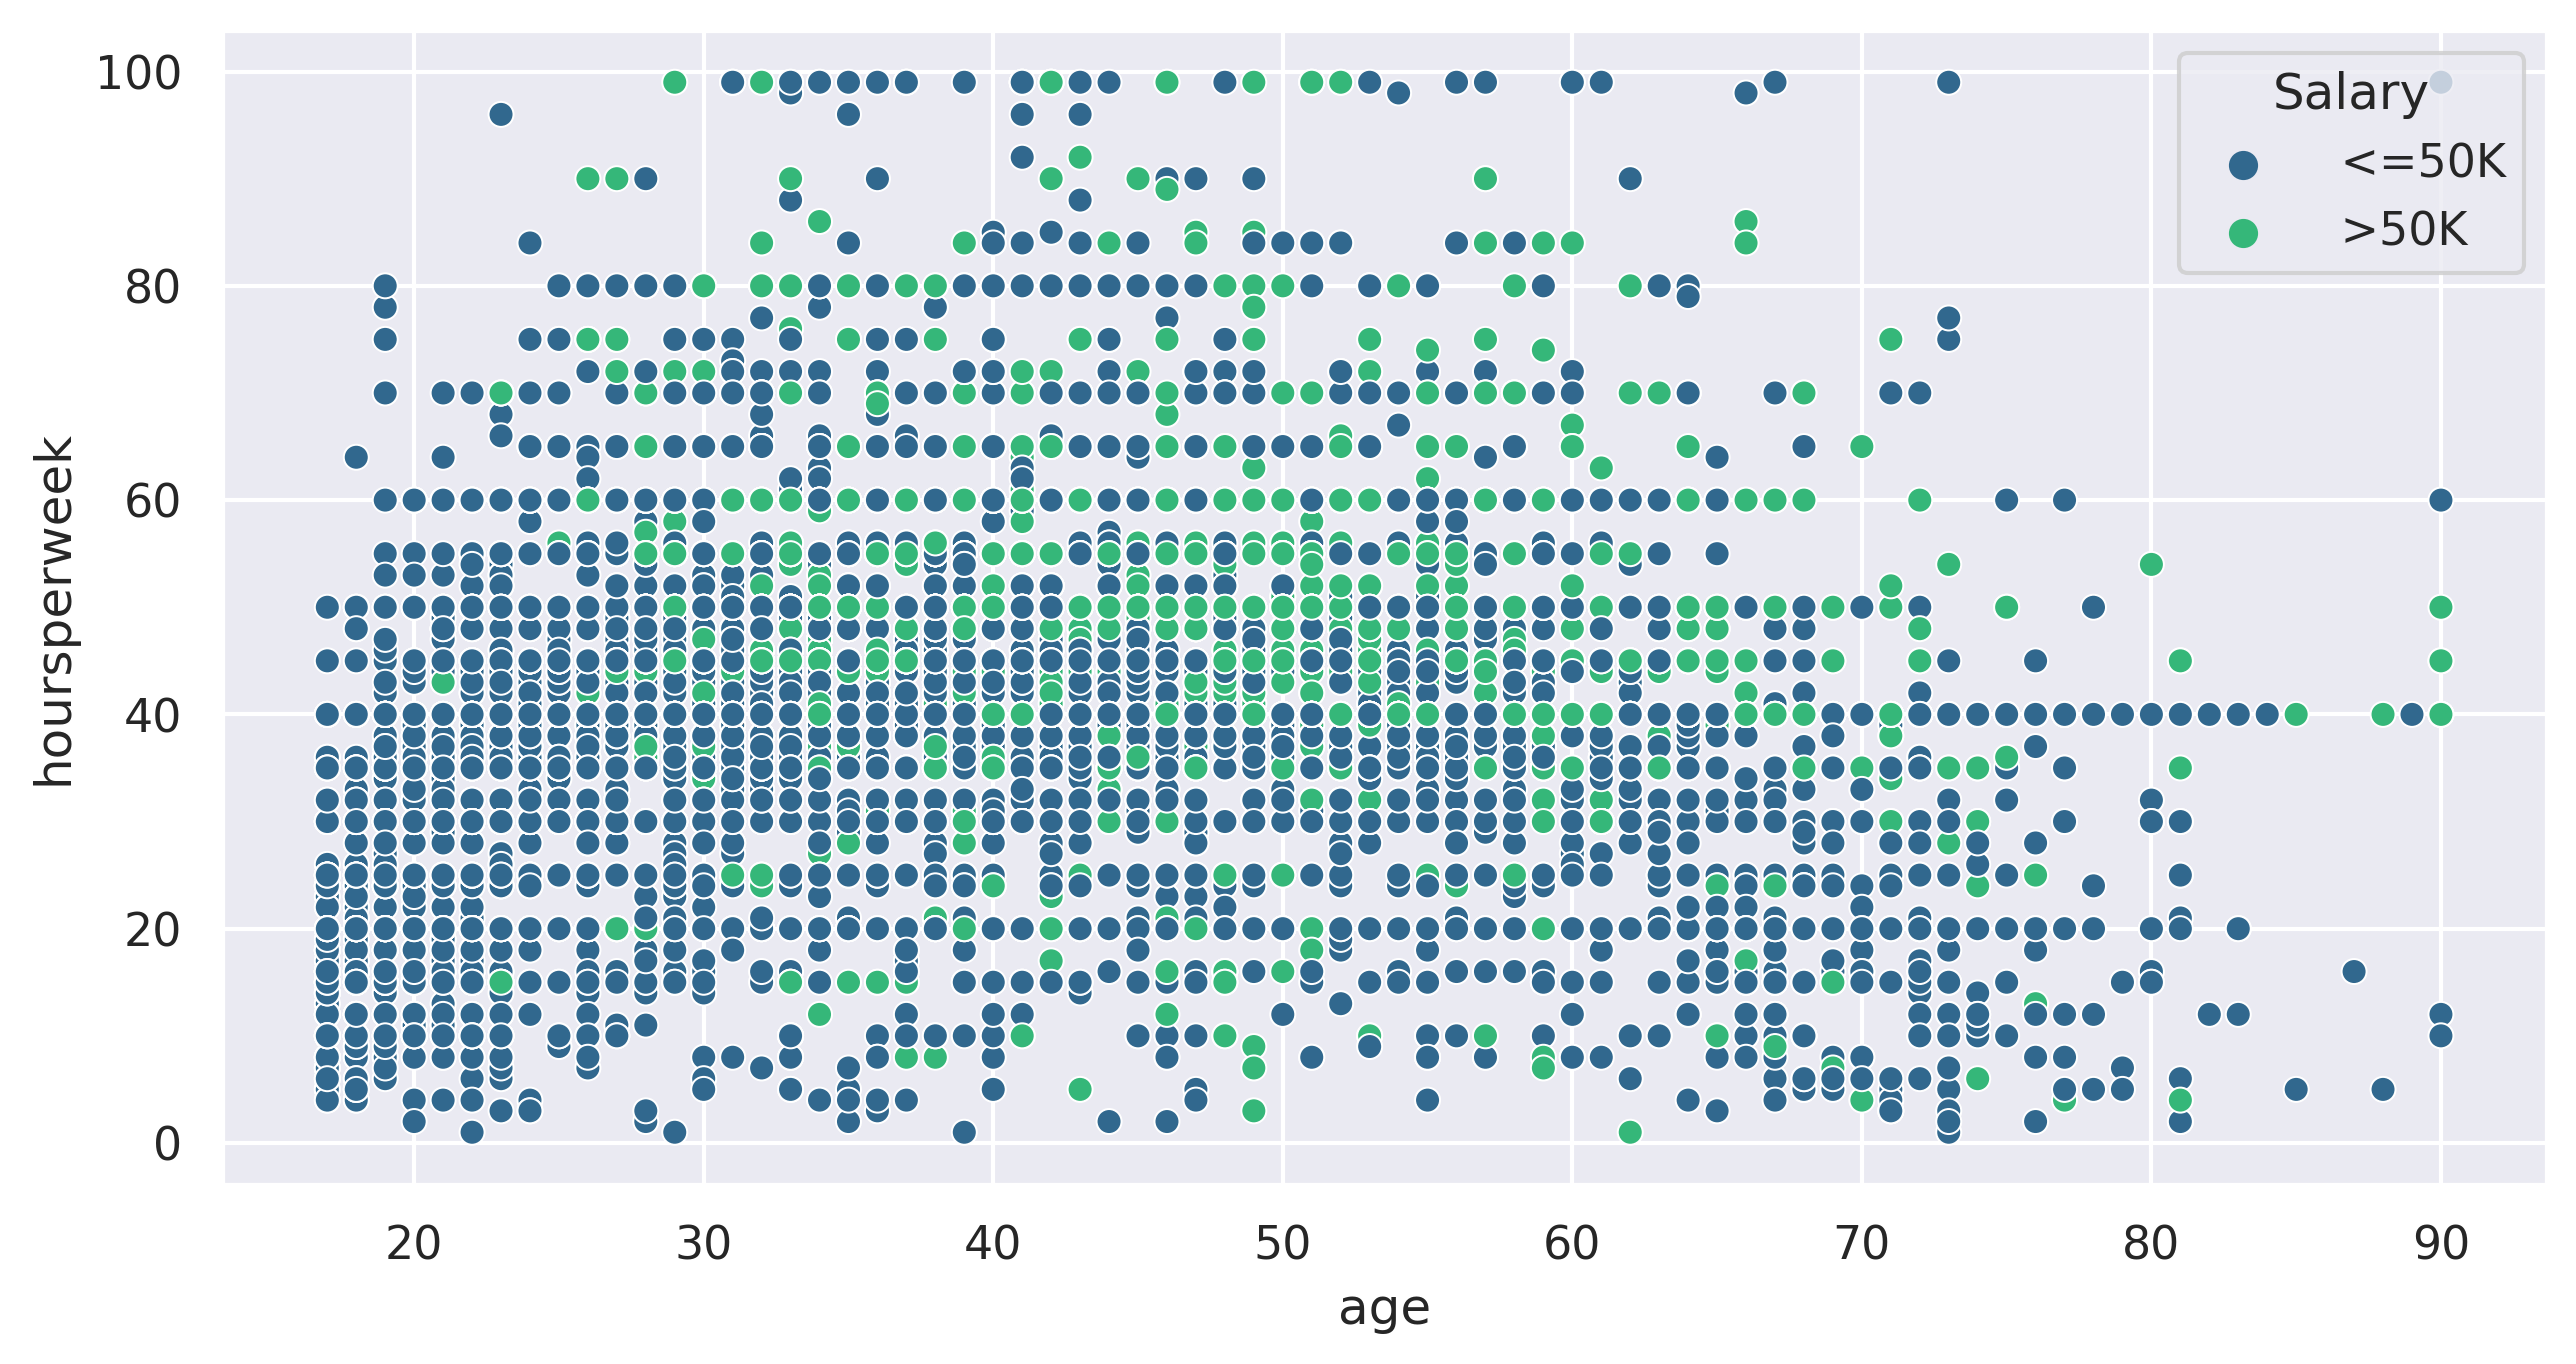

In [29]:
sns.scatterplot(x=df2['age'],y=df2['hoursperweek'],hue=df2['Salary'],palette='viridis')

In [30]:
x = df2.iloc[:,:-1]
y = df2['Salary']

In [31]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [32]:
svm = SVC()
svm.fit(xtrain,ytrain)
ypred = svm.predict(xtest)

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

       <=50K       0.79      1.00      0.88      2284
        >50K       0.96      0.18      0.30       728

    accuracy                           0.80      3012
   macro avg       0.87      0.59      0.59      3012
weighted avg       0.83      0.80      0.74      3012



In [35]:
svm.score(xtrain,ytrain),svm.score(xtest,ytest)

(0.7936586985391766, 0.798804780876494)

In [36]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [37]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [38]:
svm = SVC(kernel='poly')
svm.fit(xtrain,ytrain)
ypred=svm.predict(xtest)

In [39]:
svm.score(xtrain,ytrain),svm.score(xtest,ytest)

(0.800132802124834, 0.8007968127490039)